# Mobile Price Prediction

![caption](20150228_LDP001_0.jpg)

## Description of data 

#####  In this data set we have 20 different features of a mobile phone which effect the price .
#####  Here we have Two different Data Sets
###### > Training Data Set for Building the Model
###### > Testing Data set  for Predicting the Price 

###      Description of Features
        1> battery_power : Battery Backup measured in mAh
        
        2> blue : Has Bluetooth or not
        
        3> clock_speed : the speed at which microprocessor executes instructions
        
        4> dual_sim : Has dual sim support or not
        
        5> fc : Front Camera megapixels
        
        6> four_g  : Has 4G or not
        
        7> int_memory : Internal Memory in Gigabytes
        
        8> m_dep : Mobile Depth in cm
        
        9> mobile_wt : Weight of mobile phone
        
        10> n_cores : Number of cores of the processor
        
        11> pc : Primary Camera megapixels
        
        12> px_height : Pixel Resolution Height
        
        13> px_width  : Pixel Resolution Width
        
        14> ram  : Random Access Memory in MegaBytes
        
        15> sc_h : Screen Height of mobile in cm
        
        16> sc_w : Screen Width of mobile in cm
        
        17> talk_time : the longest time that a single battery charge will last
        
        18> three_g : Has 3G or not
        
        19> touch_screen : Has touch screen or not
        
        20> wifi : Has wifi or not
        
        21> price_range : This is the target variable with a value of
                      0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). 


###   > Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### > Load Data

In [13]:
#loading training data

train_data=pd.read_csv('C:/Users/kadam/Downloads/mobile_price_pred/train.csv')
training_data = train_data.drop( columns = ['fc','n_cores','px_height' ,'px_width', "wifi" ,
                                     "blue" , "clock_speed" , "dual_sim", "m_dep","mobile_wt", "talk_time" ,
                                           "three_g" , "touch_screen" ,"wifi"])

#loading testing data

test_data=pd.read_csv('C:/Users/kadam/Downloads/mobile_price_pred/test.csv')
testing_data = test_data.drop( columns = ['fc','n_cores','px_height' ,'px_width' ,'id', "wifi" ,
                                          "blue" , "clock_speed" , "dual_sim", "m_dep","mobile_wt", "talk_time" , "three_g" , "touch_screen" ,
                                          "wifi"])

In [14]:
training_data.head(10)

,battery_power,four_g,int_memory,pc,ram,sc_h,sc_w,price_range
0,842,0,7,2,2549,9,7,1
1,1021,1,53,6,2631,17,3,2
2,563,1,41,6,2603,11,2,2
3,615,0,10,9,2769,16,8,2
4,1821,1,44,14,1411,8,2,1
5,1859,0,22,7,1067,17,1,1
6,1821,1,10,10,3220,13,8,3
7,1954,0,24,0,700,16,3,0
8,1445,0,53,14,1099,17,1,0
9,509,1,9,15,513,19,10,0


In [15]:
testing_data.head(10)

,battery_power,four_g,int_memory,pc,ram,sc_h,sc_w
0,1043,0,5,16,3476,12,7
1,841,1,61,12,3895,6,0
2,1807,0,27,4,2396,17,10
3,1546,1,25,20,3893,10,0
4,1434,1,49,18,1773,15,8
5,1464,1,50,9,3506,10,7
6,1718,0,47,3,3873,14,2
7,833,0,62,2,1495,7,2
8,1111,1,25,19,3485,11,9
9,1520,0,25,20,651,6,0


In [16]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
battery_power    2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
pc               2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
price_range      2000 non-null int64
dtypes: int64(8)
memory usage: 125.1 KB


In [17]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
battery_power    1000 non-null int64
four_g           1000 non-null int64
int_memory       1000 non-null int64
pc               1000 non-null int64
ram              1000 non-null int64
sc_h             1000 non-null int64
sc_w             1000 non-null int64
dtypes: int64(7)
memory usage: 54.8 KB


# DATA VISUALIZATION

###  > Heat Map

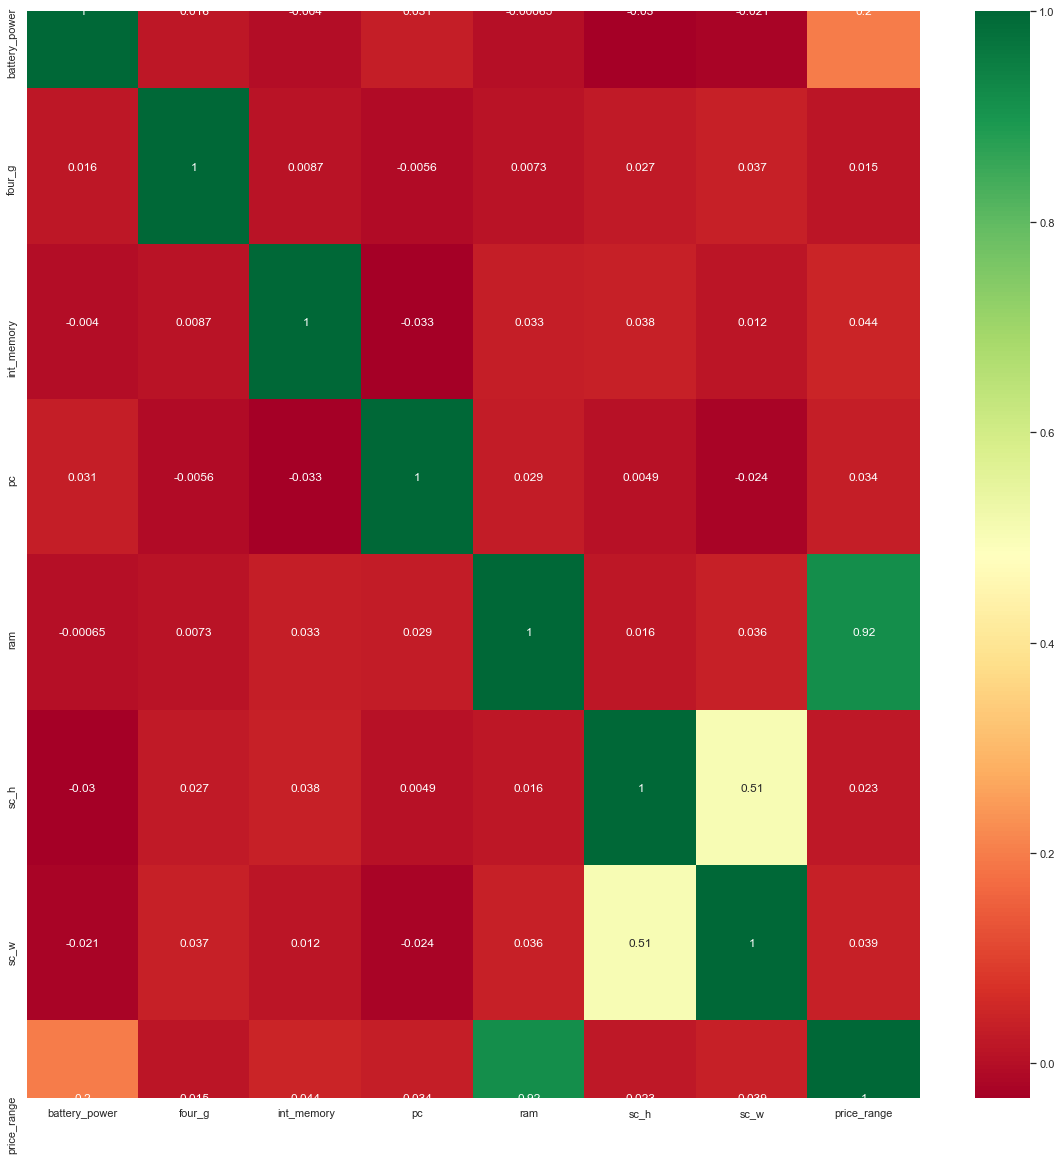

In [19]:
X = training_data.drop(['price_range'],axis=1)                     #independent columns
y = training_data['price_range']                                   #target column i.e price range

#get correlations of each features in dataset

corrmat = training_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(training_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### > Line Plot

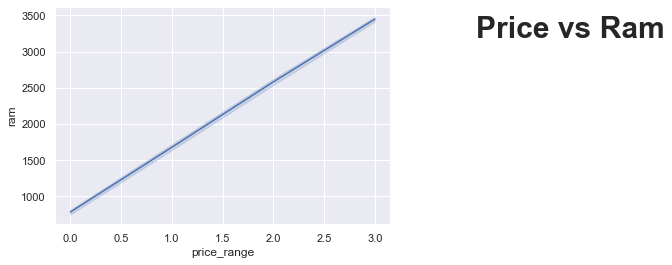

In [20]:
sns.set(style='darkgrid')
sns.lineplot(x = 'price_range', y = 'ram', data = training_data);
plt.text (x= 4, y=3200 , s = "Price vs Ram",fontsize = 30, weight = 'bold');

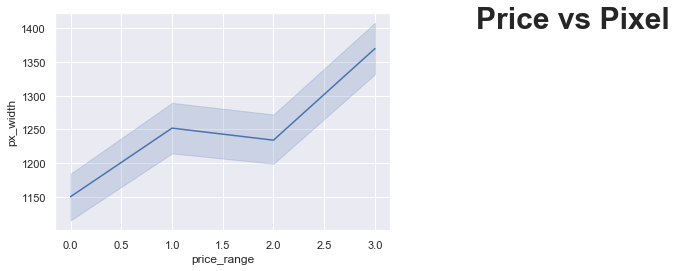

In [6]:
sns.set(style='darkgrid')
sns.lineplot(x = 'price_range', y = 'px_width', data = train_data);
plt.text (x= 4, y=1400 , s = "Price vs Pixel",fontsize = 30, weight = 'bold');

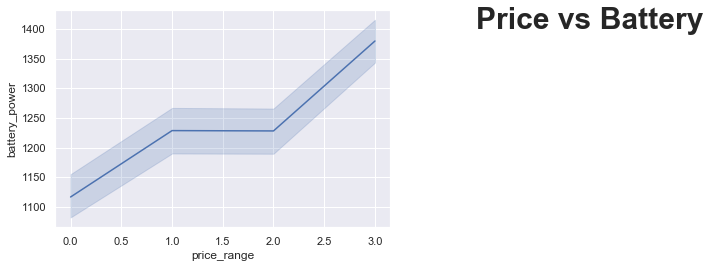

In [21]:
sns.set(style='darkgrid')
sns.lineplot(x = 'price_range', y = 'battery_power', data = training_data);
plt.text (x= 4, y=1400 , s = "Price vs Battery",fontsize = 30, weight = 'bold');

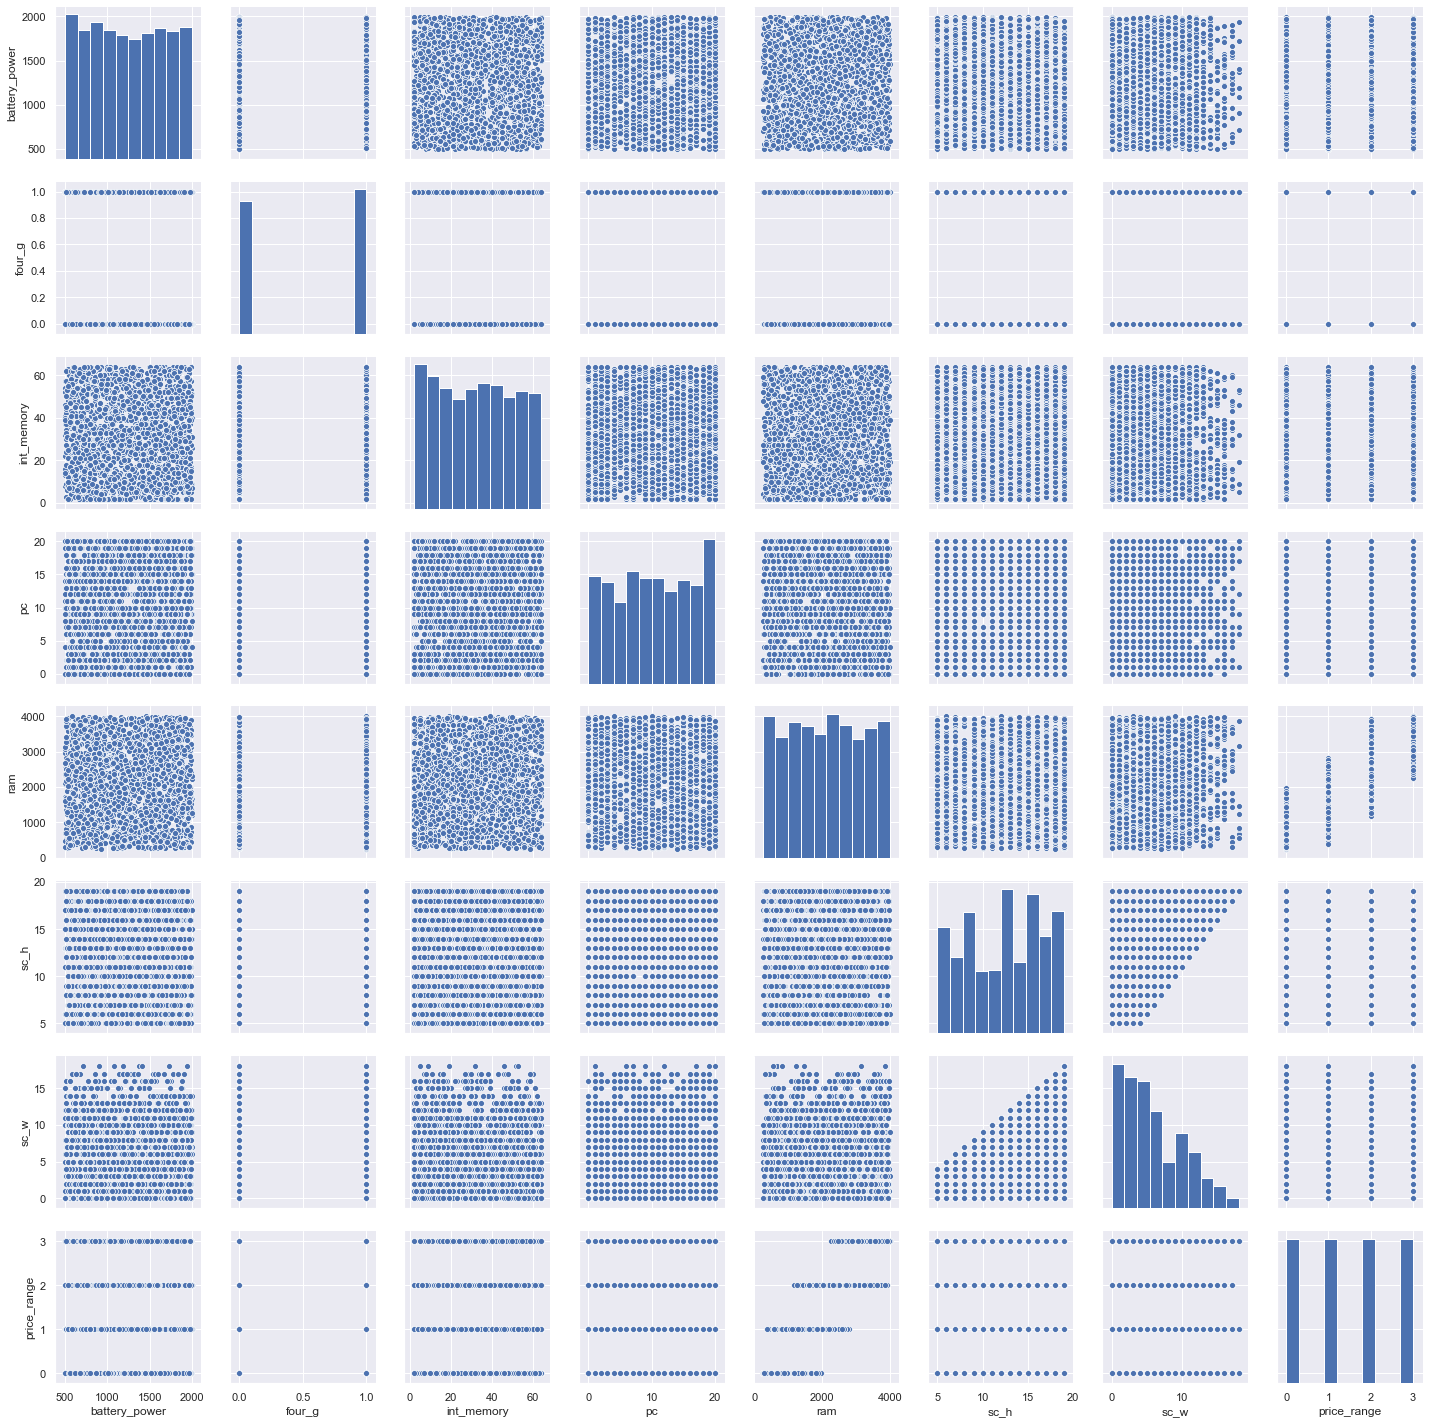

In [23]:
sns.pairplot(training_data)

### > Building Model 

In [24]:
print(training_data.shape)

(2000, 8)


In [25]:
training_data.keys()

Index(['battery_power', 'four_g', 'int_memory', 'pc', 'ram', 'sc_h', 'sc_w',
       'price_range'],
      dtype='object')

In [26]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
battery_power    2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
pc               2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
price_range      2000 non-null int64
dtypes: int64(8)
memory usage: 125.1 KB


In [27]:
training_data.dtypes

battery_power    int64
four_g           int64
int_memory       int64
pc               int64
ram              int64
sc_h             int64
sc_w             int64
price_range      int64
dtype: object

### > Spliting Data into Features and Labels

In [28]:
Features=training_data.drop( columns = ['price_range'])

In [29]:
Features.head()

,battery_power,four_g,int_memory,pc,ram,sc_h,sc_w
0,842,0,7,2,2549,9,7
1,1021,1,53,6,2631,17,3
2,563,1,41,6,2603,11,2
3,615,0,10,9,2769,16,8
4,1821,1,44,14,1411,8,2


In [30]:
Label=train_data['price_range']

In [31]:
Label.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(Features,Label,random_state=4,test_size=0.2)


###  > Linear Regression


In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
from sklearn.metrics import mean_squared_error
predict=lr.predict(x_test)
mean_squared_error(predict,y_test)

0.14966820407851716

### > For finding Accuracy 

In [35]:
acc=lr.score(x_test,y_test)*100
print("Accuracy of the Model is = ", acc ,"%")

Accuracy of the Model is =  88.57227469562888 %


### > Knn

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### > For inding Accuracy & MSE 

In [37]:
knn_predict=knn.predict(x_test)
print("Accuracy of Model is :" , knn.score(x_test,y_test)*100,"%")
print("Mean Square Error is :" , mean_squared_error(knn_predict,y_test)*100 ,"%")

Accuracy of Model is : 83.0 %
Mean Square Error is : 17.0 %


### > Predicting the price 

In [38]:
test_data.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [42]:
testing_data.keys()

Index(['battery_power', 'four_g', 'int_memory', 'pc', 'ram', 'sc_h', 'sc_w'], dtype='object')

In [43]:
training_data.keys()

Index(['battery_power', 'four_g', 'int_memory', 'pc', 'ram', 'sc_h', 'sc_w',
       'price_range'],
      dtype='object')

### > Predicting the "Price_range"

In [44]:
testing_data.keys()

Index(['battery_power', 'four_g', 'int_memory', 'pc', 'ram', 'sc_h', 'sc_w'], dtype='object')

In [45]:
test_predict=knn.predict(testing_data)

In [46]:
print(test_predict)

[3 3 2 3 1 3 3 0 3 0 3 3 0 0 2 0 2 1 3 2 0 2 1 1 3 0 2 0 3 0 2 0 2 0 0 1 2
 2 3 1 1 2 0 0 0 1 1 2 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 2 1 1 1 2 1 1 1 2 2 3
 3 0 2 0 2 3 1 3 3 0 3 0 3 1 3 0 1 2 3 0 2 2 0 2 1 3 1 0 0 2 1 2 0 1 2 3 3
 2 1 3 3 3 3 1 3 0 0 3 2 2 1 0 3 2 2 1 0 1 1 1 3 0 2 0 3 2 1 3 1 2 3 3 3 3
 1 3 2 3 0 0 3 2 3 3 3 3 2 2 3 2 3 3 1 0 3 0 0 0 1 0 0 1 1 0 1 2 0 0 0 0 2
 2 2 0 0 0 0 0 0 3 1 1 2 2 2 3 1 2 3 2 3 1 1 1 1 0 1 2 1 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 2 0 3 0 3 1 2 0 0 2 1 3 2 3 1 2 3 0 0 3 3 3 1 3 1
 0 3 2 1 2 3 3 3 1 0 1 2 2 1 1 3 2 0 3 0 1 2 0 0 3 2 3 2 2 1 3 2 2 3 1 2 1
 1 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 1 2 1 2 0 0 0 1 3 1 0 0 0 3 2 0 3 3 0
 3 2 2 3 1 3 3 2 2 3 3 3 0 3 1 3 1 3 1 3 2 0 1 1 3 1 3 2 3 0 0 0 0 2 0 0 1
 2 1 2 2 2 0 1 0 0 3 2 1 2 1 1 2 1 2 3 1 1 3 2 1 2 0 1 0 0 3 2 1 0 2 0 0 1
 0 0 0 0 2 2 3 1 3 0 3 1 3 0 2 1 1 1 0 2 2 3 2 1 3 2 3 2 3 2 1 2 2 1 2 0 0
 0 1 2 0 1 3 2 0 2 2 0 0 3 1 1 0 3 2 3 0 3 1 2 3 2 3 0 1 0 2 2 0 1 1 0 0 1
 1 2 3 3 2 2 2 1 1 2 2 2 

In [47]:
test_data['price_range']=test_predict
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


![caption](141124-thankyou-stock.jpg)